# Group 10 - Project Phase 1
This notebook is the work and submission of Group 10 of CSMODEl Section S16. The group's members consist of:
* David, Peter Jan B.
* De Guzman, Evan Mari B.
* Manaois, Kyla Nicole G.
* Wangkay, Laurize Jeante G.


## Brief Description of the Dataset
The dataset being used for this study is the Spotify Top-2000s Mega Dataset. This dataset contains the Top 2000 songs in spotify, ranging from the years 1956 to 2019. This dataset has been acquired from Kaggle.com and was produced by the user Sumat Singh.

### Data Collection Process
In collecting the data, the creator of this dataset used a third party website using this link, http://sortyourmusic.playlistmachinery.com/. This third party website uses the Spotify API to extract the data of a certain song and is then collected. The third party website was created by Paul Lamere.

### Structure of the Dataset
The structure of the dataset is quite simple. There exists 1994 observations or rows and there are 15 variables or columns. Each row is an entire set of information of a song, from its title and its artist, to its popularity. Each column represents a certain variable to be discussed further after this section. The only column that has no significance in the dataset is the index column attached with the dataset as to say that the index has no real merit in ranking the song. 

## Variables in the Dataset 
- **`Title`**: Name of the track.
- **`Artist`**: Name of the artist.
- **`Top Genres`**: Genre that the track applies to.
- **`Year`**: Release year of the track.
- **`Beats per Minute (BPM)`**: Tempo of the song.
- **`Energy`**: Energy of the song. A higher value pertains to the song being more energetic.
- **`Danceability`**: Danceability of the song. A higher value pertains to how easier it is to dance to a song.
- **`Loudness`**: Loudness of the song. A higher value pertains a louder song. 
- **`Valence`**: The positivity of a song. A higher value pertains to a more positive mood for the song.
- **`Length`**: The duration of the song.
- **`Acoustic`**: The acoustic value of the song. A higher value pertains that the song was made less electronically. 
- **`Speechiness`**: The presence of spoken words in the song. A higher value pertains that the song has more spoken words.
- **`Popularity`**: The popularity of a song. A higher value pertains to a more popular song.

## Data Cleaning


### Importing Libraries
For this section of the notebook, our main focus is simply cleaning the dataset. To fufill this purpose, it is a necessity to import the numpy and the pandas library.

In [1]:
import numpy as np
import pandas as pd

Then to load the dataset and view the first few rows with the use of `head()` function

In [2]:
spotify_df = pd.read_csv("Spotify-2000.csv")
spotify_df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


Now to view the general dataset information with the use of `info()` function

In [3]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

Thanks to the `info()` function, we can see that there are 1994 observations and 15 columns. And within the same function, we get to see that there are exactly 1994 non-null items in every column. To double-check, this code is employed.

In [4]:
spotify_df.isnull().any()

Index                     False
Title                     False
Artist                    False
Top Genre                 False
Year                      False
Beats Per Minute (BPM)    False
Energy                    False
Danceability              False
Loudness (dB)             False
Liveness                  False
Valence                   False
Length (Duration)         False
Acousticness              False
Speechiness               False
Popularity                False
dtype: bool

Now to further check the correctness of the data, the Title and Artists should have capitalized strings. To do so, the group employed the use of a function to return a boolean checking if the first character of a string is capitalized or not.

In [5]:
def is_capitalized(s):
    return s == s.title()

is_title = spotify_df['Title'].apply(is_capitalized)
is_artist = spotify_df['Artist'].apply(is_capitalized)

capital_check = pd.DataFrame(
    {
    'Title' : is_title,
    'Artist' : is_artist
    }
)
capital_check

,Title,Artist
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
1989,True,True
1990,True,True
1991,True,True
1992,True,True


### Uniqueness of Values

Now, there exists another possible problem in regards to the uniqueness of certain values. For example, the title "Hallelujah" has 3 different instances. Isolated within the variable 'Title', a method of data cleaning could have been employed. However, considering other variables such as Artist or Top Genre along with BPM, Valence and the such, no method of data cleaning will be employed on such values with the same title and thus are considered unique.

In [6]:
spotify_df.loc[(spotify_df['Title'] == 'Hallelujah')]

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
354,355,Hallelujah,Lisa Lois,dutch pop,2009,182,24,19,-13,11,11,226,24,3,49
1268,1269,Hallelujah,Leonard Cohen,canadian folk,1984,171,34,28,-13,13,23,277,72,3,67
1631,1632,Hallelujah,Jeff Buckley,alternative rock,1994,97,14,32,-10,18,8,414,93,3,73


### The Index Column

Here is a point of contention within the group for the use of the dataset within this section. The dataset is, by all means, clean. All Titles and Artists have correct data types and are in one proper format. The only problem that is noticed within this dataset is the use of an artificial number column called 'Index'. 

Meaning to say, the elements under 'Index' are simply numbers that have no real meaning or information. So as to say, a song having the Index number 1 does not denote it to be the Top 1 song in any possible relation with a variable. Due to this, it was decided upon by the group to have the Index column removed. To justify this decision, as mentioned, it is simply an incrementing artificial number and has no real value. Furthermore, data frames have a built-in identifying index per observation and thus is also redundant. To drop the column, the `drop()` function shall be used.

In [7]:
spotify_df = spotify_df.drop(['Index'], axis = 1)

Effectively, there are now only 14 columns or variables of interest.

### Feature Engineering

The nature of this dataset is practically clean, besides the redundant `Index` column. In this case, to make up for the lack of need of data cleaning, the group will instead do feature engineering. In essence, the group will try to create new variables that can be of value for further analysis and study.

Firstly, we can make a categorized mood category that uses the Valence and Energy variables, called the `Affective Mood`. There would be three moods, those being Happy, Calm or Sad. 

In [8]:
def mood_category(row):
    if row['Valence'] > 50 and row['Energy'] > 50:
        return 'Happy'
    elif row['Valence'] > 50 and row['Energy'] <= 50:
        return 'Calm'
    else:
        return 'Sad'

spotify_df['Affective Mood'] = spotify_df.apply(mood_category, axis = 1)
spotify_df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Affective Mood
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Calm
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Happy
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,Happy
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Sad
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63,Calm
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69,Happy
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74,Happy
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65,Calm


Another feature that we can add is the decade of the release of the song. For this, our primary focus is the `Year` variable and making a `Decade` variable.

In [9]:
spotify_df['Decade'] = (spotify_df['Year'] // 10) * 10
spotify_df

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Affective Mood,Decade
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Calm,2000
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Happy,2000
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,Happy,2000
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Sad,2000
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,Happy,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63,Calm,1950
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69,Happy,1950
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74,Happy,1950
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65,Calm,1950


Now there exists in our dataframe observations showing what decade a song has released. 

## Exploratory Data Analysis

In this portion, we perform an explanatory data analysis to have a comprehensive understanding of the Spotify dataset. This is to help in the formulation of the research question of the project.



## Importing more libraries

Considering the nature of exploratory data analysis, there is aneed for more python libraries. The said libraries would be `matplotlib` and `scipy`.   

In [ ]:
import matplotlib.pyplot as plt

[will be deleted]
CLT
1 What are the mean, median, and mode for each numeric attribute (BPM, Energy, Danceability, Loudness, Valence, Length, Acoustic, Speechiness, Popularity)?
   sub question: What is the standard deviation and variance for these numeric attributes?

Correlation
2 Is there a correlation between the popularity of a song and its other attributes (e.g., Energy, Danceability, Loudness, etc.) (correlation matrix + heatmap)?
3 Is there a relationship/correlation between the general genre and its affective mood? //not sure
4 How does the BPM correlate with Danceability and Energy?

Trends and Genre //from previous thingy
5 How do the average values of numeric features change over the years (Year-wise trends)?
  sub question: Are there any noticeable trends in the popularity of songs over the years?
6 What are the average values of numeric features for each genre (Top Genres)?
  sub question: How does the popularity vary across different genres?

7 What are the distributions (histograms) for Energy, Danceability, Loudness, Valence, Acoustic, Speechiness, and Popularity?
   sub question: Are there any outliers in these distributions?


#code here

### Question 1 
What are the mean, median, and mode for each numeric attribute (BPM, Energy, Danceability, Loudness, Valence, Length, Acoustic, Speechiness, Popularity)? 

To answer this question, first, we duplicate the dataframe in the event that it changes the original dataframe. Next, we use the extra step of converting string values to numeric and drop them as the code also reads the title of each column (eg. Energy: [values], the Energy title gets read). Then, we read each column and calculate the mean, median, and mode. Finally, we format them to display in only 2 decimal places.

### Question 1: What are the common ranges for `Beats Per Minute (BPM)` in the dataset? 

For the Numerical Summary, we will compute summary statistics for 'Beats Per Minute (BPM)' and observe its distribution. While for the Visualization, a histogram will be used to visualize the distribution of 'BPM'.

count    1994.000000
mean      120.215647
std        28.028096
min        37.000000
25%        99.000000
50%       119.000000
75%       136.000000
max       206.000000
Name: Beats Per Minute (BPM), dtype: float64


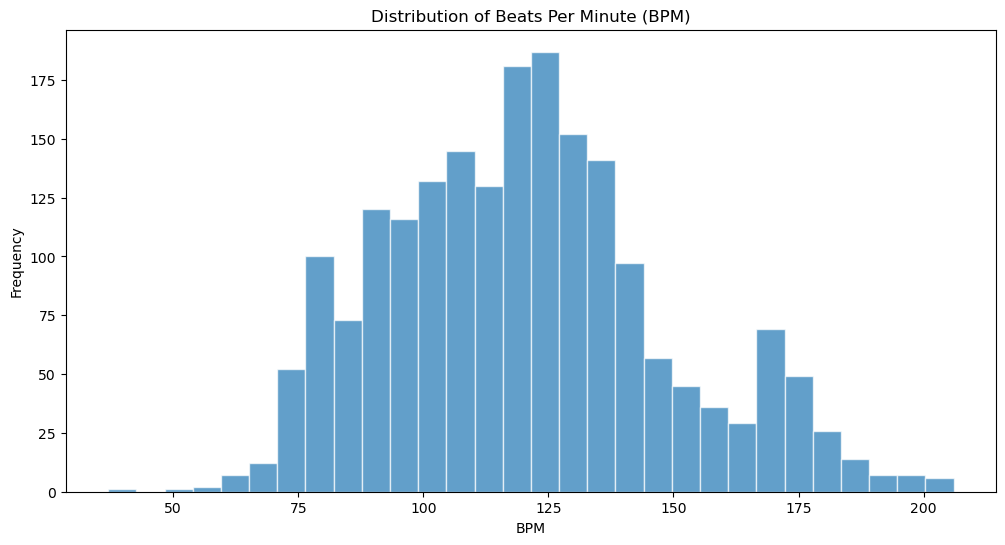

In [ ]:
bpm_summary = spotify_df['Beats Per Minute (BPM)'].describe()
print(bpm_summary)


plt.figure(figsize=(12, 6))
plt.hist(spotify_df['Beats Per Minute (BPM)'], bins=30, edgecolor='w', alpha=0.7)
plt.title('Distribution of Beats Per Minute (BPM)')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.show()

The numerical summary provides insight into the central tendency (mean, median) and dispersion (standard deviation, range) of the BPM values in the dataset. The histogram helps visualize how BPM values are distributed across the dataset, showing common ranges and potential outliers.

### Question 2: Which genres are most prevalent in this dataset?

For the Numerical Summary, we will calculate the frequency of each genre. While for the Visualization, bar chart will be used to display the most prevalent genres.

Top Genre
album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
Name: count, dtype: int64


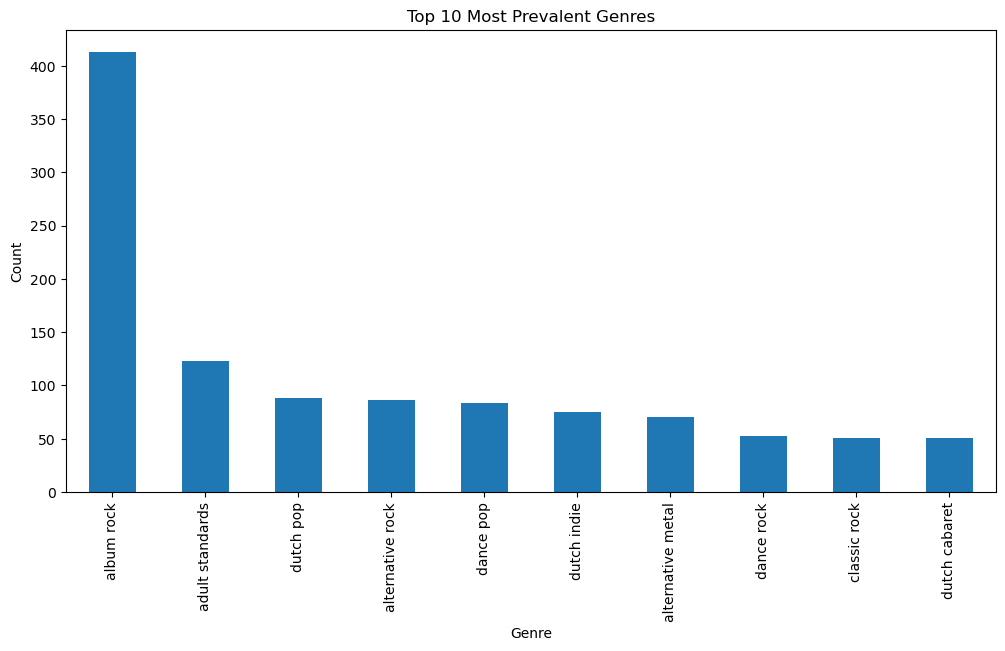

In [ ]:
genre_counts = spotify_df['Top Genre'].value_counts()

top_genres = genre_counts.head(10)
print(top_genres)

plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title('Top 10 Most Prevalent Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

The frequency count shows which genres are most common in the dataset. The bar chart provides a visual representation, making it easier to compare the prevalence of different genres at a glance.

### Question 3: What genres tend to have longer song durations?

In [ ]:
numeric_columns = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity']

numeric_df = spotify_df[numeric_columns].copy()
summary_stats = {'Attribute': [], 'Mean': [], 'Median': [], 'Mode': []}

for column in numeric_columns:
    if column in numeric_df.columns:
        numeric_df[column] = pd.to_numeric(numeric_df[column], errors='coerce')

        summary_stats['Attribute'].append(column)
        summary_stats['Mean'].append(numeric_df[column].mean())
        summary_stats['Median'].append(numeric_df[column].median())
        summary_stats['Mode'].append(numeric_df[column].mode().dropna().values[0] if not numeric_df[column].mode().dropna().empty else None)
    else:
        print(f"Column {column} not found in the DataFrame")
        
summary_df = pd.DataFrame(summary_stats)
summary_df['Mean'] = summary_df['Mean'].map("{:.2f}".format)
summary_df['Median'] = summary_df['Median'].map("{:.2f}".format)
summary_df['Mode'] = summary_df['Mode'].map("{:.2f}".format)
print(summary_df)

### Question 4: What is the average song length `Length (Duration)` by genre?

For the Numerical Summary, we will compute the average song length for each genre. While for the Visualization, a bar chart will display the average song length for the top genres.

### Question 5: Which `Top Genre` has the highest average `Popularity`? 

## Research Question

## Research Question